In [12]:
import librosa
import numpy as np
import matplotlib.pyplot as plt
import util 

pygame 2.0.1 (SDL 2.0.14, Python 3.8.5)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [2]:
y, sr, file = util.loadSongFromMp3('JukeboxHero')

In [3]:
# default hop length = n_fft // 4
# rows in D = (1 + n_fft/2)
D = librosa.stft(y[0], n_fft=2048)

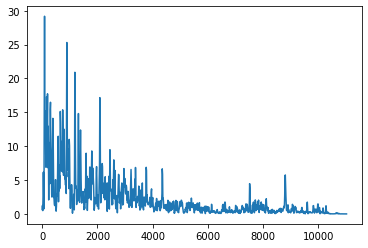

In [4]:
t = 250
fSlice = np.abs(D[:, util.timeToBin(t, D, sr)])
frequencies = list(map(util.binToFreq, np.arange(0, D.shape[0], 1)))
plt.plot(frequencies, fSlice)

In [63]:
tStart = util.timeToBin(20, D, sr)
tStop = util.timeToBin(30, D, sr)

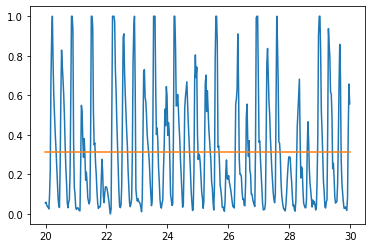

In [96]:
# Sub Base
s = util.accumulateRange(D, 20, 60)[tStart:tStop]
m = 3
s = np.clip(s, 0, np.average(s)*m)
n = (s - np.min(s))/(np.max(s) - np.min(s))
plt.plot(util.getTimes(D, sr)[tStart:tStop], n)
plt.plot(util.getTimes(D, sr)[tStart:tStop], np.ones_like(n)*np.average(n))
plt.show()

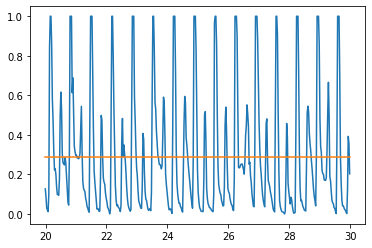

In [95]:
# Base
s = util.accumulateRange(D, 60, 250)[tStart:tStop]
m = 3
s = np.clip(s, 0, np.average(s)*m)
n = (s - np.min(s))/(np.max(s) - np.min(s))
plt.plot(util.getTimes(D, sr)[tStart:tStop], n)
plt.plot(util.getTimes(D, sr)[tStart:tStop], np.ones_like(n)*np.average(n))
plt.show()

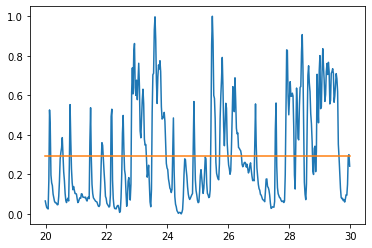

In [97]:
# Midrange
s = util.accumulateRange(D, 500, 2000)[tStart:tStop]
m = 3
s = np.clip(s, 0, np.average(s)*m)
n = (s - np.min(s))/(np.max(s) - np.min(s))
plt.plot(util.getTimes(D, sr)[tStart:tStop], n)
plt.plot(util.getTimes(D, sr)[tStart:tStop], np.ones_like(n)*np.average(n))
plt.show()

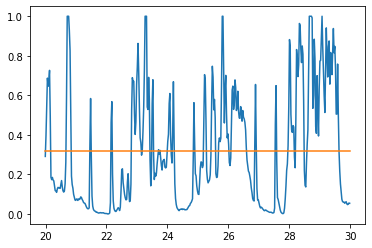

In [102]:
# Presence
s = util.accumulateRange(D, 4000, 6000)[tStart:tStop]
m = 3
s = np.clip(s, 0, np.average(s)*m)
n = (s - np.min(s))/(np.max(s) - np.min(s))
plt.plot(util.getTimes(D, sr)[tStart:tStop], n)
plt.plot(util.getTimes(D, sr)[tStart:tStop], np.ones_like(n)*np.average(n))
plt.show()

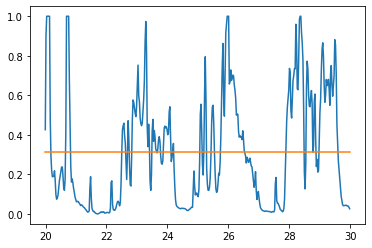

In [103]:
# Briliance
s = util.accumulateRange(D, 6000, 10000)[tStart:tStop]
m = 3
s = np.clip(s, 0, np.average(s)*m)
n = (s - np.min(s))/(np.max(s) - np.min(s))
plt.plot(util.getTimes(D, sr)[tStart:tStop], n)
plt.plot(util.getTimes(D, sr)[tStart:tStop], np.ones_like(n)*np.average(n))
plt.show()

In [1]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

birdy_uri = 'spotify:artist:2WX2uTcsvV5OnS0inACecP'
spotify = spotipy.Spotify(client_credentials_manager=SpotifyClientCredentials())

results = spotify.artist_albums(birdy_uri, album_type='album')
albums = results['items']
while results['next']:
    results = spotify.next(results)
    albums.extend(results['items'])

for album in albums:
    print(album['name'])

Beautiful Lies
Beautiful Lies
Beautiful Lies (Deluxe)
Beautiful Lies (Deluxe)
Fire Within
Fire Within
Fire Within (Deluxe)
Fire Within (Deluxe)
Fire Within (Deluxe)
Live in London
Birdy
Birdy
Birdy
Birdy
Birdy (Deluxe Version)


In [ ]:
# Apple Music
# /Users/michaelequi/Music/Music/Media.localized/Apple Music/Eagles/Hotel California/

In [16]:
import os 
song = os.listdir('/Users/michaelequi/Music/Music/Media.localized/Apple Music/Eagles/Hotel California/')[0]
print(song)

01 Hotel California.m4p


In [8]:
from pathlib import Path
f = Path('/Users/michaelequi/Music/Music/Media.localized/Apple Music/Eagles/Hotel California/', song)

In [13]:
util.playSong(f)

error: Module format not recognized